<a href="https://colab.research.google.com/github/Nahla-yasmine/Arabic-News-Scraper/blob/main/(Aljazeera)Web_Scraping_NEWS_Articles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Scraping NEWS Articles

In [54]:
!pip install selenium


In [55]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.aljazeera.net/health/'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find all article titles
titles = soup.find_all('h2', class_='aj-h2')
for title in titles:
    print(title.text.strip())


In [56]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def get_article_text(article_url):
    response = requests.get("https://www.aljazeera.net" + article_url)
    soup = BeautifulSoup(response.text, 'html.parser')
    article_text = ' '.join([p.text.strip() for p in soup.find_all('p')])
    return article_text

def scrape_aljazeera_health():
    url = 'https://www.aljazeera.net/health/'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    articles = soup.find_all('a', class_='u-clickable-card__link')

    data = []
    for article in articles:
        title = article.find('span').text.strip()
        article_url = article['href']
        full_text = get_article_text(article_url)

        data.append({'Title': title, 'Link': article_url, 'Text': full_text})

    df = pd.DataFrame(data)
    return df

if __name__ == "__main__":
    df = scrape_aljazeera_health()
    print(df)





                                                Title  \
0   أدق صورة دماغ باستخدام أقوى أجهزة التصوير بالر...   
1                ‫هذه الأعراض تنذر بالساركويد العصبي‬   
2                      ‫ما هي متلازمة "فون ويلبراند"؟   
3             السجائر الإلكترونية تزيد خطر قصور القلب   
4   باحثون أميركيون يطورون آذانا بشرية صناعية تبدو...   
5              تفسير الأحلام طبيا.. هذا ما يعنيه حلمك   
6   كم سنة زاد متوسط عمر البشر خلال الـ20 عاما الم...   
7                          ‫3 أسلحة لمحاربة السيلوليت   
8   أنواع الأرق.. وتمارين للتغلب عليه والحصول على ...   
9                     ‫ما أسباب الشعور بوخز في الرأس؟   
10  سمنة الأطفال تضاعف احتمالية الإصابة بالتصلب ال...   
11  خبراء تغذية: عشرات المليارات التي تنفق على الم...   
12  أقوى جهاز تصوير بالرنين المغناطيسي في العالم ق...   
13      ‫الدهون المتحولة ترفع مستوى الكوليسترول الضار   

                                                 Link  \
0   /science/2024/4/6/%D8%A3%D8%AF%D9%82-%D8%B5%D9...   
1   /health/2024/4/6/%d9%87%d8

In [57]:
df

,Title,Link,Text
0,أدق صورة دماغ باستخدام أقوى أجهزة التصوير بالر...,/science/2024/4/6/%D8%A3%D8%AF%D9%82-%D8%B5%D9...,نشرت هيئة الطاقة الذريّة في فرنسا صورة هي الأد...
1,‫هذه الأعراض تنذر بالساركويد العصبي‬,/health/2024/4/6/%d9%87%d8%b0%d9%87-%d8%a7%d9%...,قالت مؤسسة الدماغ الألمانية إن مرض ‫الساركويد ...
2,"‫ما هي متلازمة ""فون ويلبراند""؟",/health/2024/4/6/%D9%85%D8%A7-%D9%87%D9%8A-%D9...,"قالت جمعية الهيموفيليا الألمانية إن ‫متلازمة ""..."
3,السجائر الإلكترونية تزيد خطر قصور القلب,/health/2024/4/5/%d8%a7%d9%84%d8%b3%d8%ac%d8%a...,توصل باحثون إلى أن السجائر الإلكترونية تزيد بن...
4,باحثون أميركيون يطورون آذانا بشرية صناعية تبدو...,/health/2024/4/5/%D8%A8%D8%A7%D8%AD%D8%AB%D9%8...,بفضل تقنيات الطباعة الإلكترونية ثلاثية الأبعاد...
5,تفسير الأحلام طبيا.. هذا ما يعنيه حلمك,/health/2024/4/4/%D8%A7%D9%84%D8%A3%D8%AD%D9%8...,يعد عالم الأحلام مزيجا من التجارب والأفكار وال...
6,كم سنة زاد متوسط عمر البشر خلال الـ20 عاما الم...,/health/2024/4/4/%D9%83%D9%85-%D8%B3%D9%86%D8%...,ارتفع متوسط العمر العالمي المتوقع بمقدار 6.2 س...
7,‫3 أسلحة لمحاربة السيلوليت,/health/2024/4/4/3-%d8%a3%d8%b3%d9%84%d8%ad%d8...,يعد السيلوليت مشكلة تؤرق كثيرا من ‫النساء، إذ ...
8,أنواع الأرق.. وتمارين للتغلب عليه والحصول على ...,/health/2024/4/4/%d8%a3%d9%86%d9%88%d8%a7%d8%b...,يقال إن النوم الكافي هو أحد طرق النجاح. فلا يم...
9,‫ما أسباب الشعور بوخز في الرأس؟,/health/2024/4/4/%D9%85%D8%A7-%D8%A3%D8%B3%D8%...,قالت الجمعية الألمانية للصداع والصداع ‫النصفي ...


In [58]:
df.shape

(14, 3)

In [59]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def get_article_text(article_url):
    response = requests.get("https://www.aljazeera.net" + article_url)
    soup = BeautifulSoup(response.text, 'html.parser')
    article_text = ' '.join([p.text.strip() for p in soup.find_all('p')])
    return article_text

def scrape_articles_from_category(category_url, category):
    response = requests.get(category_url)
    soup = BeautifulSoup(response.text, 'html.parser')
    articles = soup.find_all('a', class_='u-clickable-card__link')

    data = []
    for article in articles:
        title = article.find('span').text.strip()
        article_url = article['href']
        full_text = get_article_text(article_url)
        data.append({'Category': category, 'Title': title, 'Link': article_url, 'Text': full_text})

    return data

def scrape_aljazeera_articles():
    category_urls = {
        'politics': 'https://www.aljazeera.net/politics/',
        'business': 'https://www.aljazeera.net/ebusiness/',
        'culture': 'https://www.aljazeera.net/culture/',
        'sport': 'https://www.aljazeera.net/sport/',
        'tech': 'https://www.aljazeera.net/tech/',
        'opinion': 'https://www.aljazeera.net/opinion/',
        'turath': 'https://www.aljazeera.net/turath/',
        'arts': 'https://www.aljazeera.net/arts/',
        'science': 'https://www.aljazeera.net/science/',
        'midan': 'https://www.aljazeera.net/midan/',
        'lifestyle': 'https://www.aljazeera.net/lifestyle/',
        'family': 'https://www.aljazeera.net/family/'
    }

    all_data = []
    for category, category_url in category_urls.items():
        data = scrape_articles_from_category(category_url, category)
        all_data.extend(data)

    df = pd.DataFrame(all_data)
    return df

if __name__ == "__main__":
    df = scrape_aljazeera_articles()



In [60]:
df

,Category,Title,Link,Text
0,politics,إيران وإسرائيل.. ما بعد قصف القنصلية وخيارات الرد,/politics/2024/4/7/%d9%82%d8%b5%d9%81-%d8%a5%d...,في محاولة لاستقراء قصف إسرائيل لقنصلية إيران ب...
1,politics,الغارديان: على حلفاء إسرائيل أن يقولوا لها “كفى”,/politics/2024/4/6/%d8%a7%d9%84%d8%ba%d8%a7%d8...,قال الكاتب كريس ماكغريل -في مقال رأي بصحيفة ال...
2,politics,شاهد: آثار تدمير الدعم السريع للكنائس في أم درمان,/programs/2024/4/6/%d8%b4%d8%a7%d9%87%d8%af-%d...,نشرت المقاومة الشعبية بأم درمان مشاهد للدمار ا...
3,politics,فضيحة بتر أطراف أسرى فلسطينيين تكشف المستور في...,/politics/2024/4/6/%d9%81%d8%b6%d9%8a%d8%ad%d8...,نابلس- رسم الاحتلال الإسرائيلي بعدوانه على الآ...
4,politics,نيوزويك: شعبية بايدن تنخفض بشكل كارثي بسبب إسر...,/politics/2024/4/6/%d9%86%d9%8a%d9%88%d8%b2%d9...,قالت مجلة نيوزويك إن شعبية الرئيس جو بايدن في...
...,...,...,...,...
163,family,كيف تتعامل مع سلوك استخفاف شريك العمر بك؟,/family/2024/3/30/%d9%83%d9%8a%d9%81-%d8%aa%d8...,رغم أن شريك العمر (الزوج أو الزوجة) هو الشخص ا...
164,family,لماذا عليك التوقف عن استخدام كريم وغسول الأطفال؟,/women/2024/3/29/%d9%84%d9%85%d8%a7%d8%b0%d8%a...,أطلقت إحدى العلامات التجارية الشهيرة نهاية الع...
165,family,كيف تتجنب وقوع ابنك ضحية متلازمة الطفل الأوسط؟,/family/2024/3/28/%D9%83%D9%8A%D9%81-%D8%AA%D8...,"تشير الأبحاث الاجتماعية إلى أن ""الطفل الأوسط"" ..."
166,family,%70 من الأطفال يهربون منها.. 7 طرق لجعل الرياض...,/family/2024/3/28/%d8%aa%d9%85%d8%a7%d8%b1%d9%...,في الوقت الذي كان يشارك فيه أكثر من 60 مليون ط...


In [61]:
df.shape

(168, 4)

# Save DataFrame to CSV

In [62]:
df.to_csv('aljazeera_articles.csv', index=False)
print("CSV file saved successfully.")

CSV file saved successfully.


#  Analyze the DataFrame df

In [63]:
df.describe()

,Category,Title,Link,Text
count,168,168,168,168
unique,12,165,165,165
top,politics,دعوى أميركية ضد هواوي تتجه للمحاكم مطلع 2026,/ebusiness/2024/4/5/%D8%AF%D8%B9%D9%88%D9%89-%...,تتجه دعوى جنائية أقامتها وزارة العدل الأميركية...
freq,14,2,2,2


In [64]:
text_nb_1 = df.loc[0, 'Text']
print(text_nb_1)


في محاولة لاستقراء قصف إسرائيل لقنصلية إيران بحي المزة في سوريا، واغتيال رجال من النخبة في فيلق القدس التابع للحرس الثوري بينهم الجنرال محمد رضا زاهدي وآخرين، يقدم مدير مكتب شبكة الجزيرة في طهران قراءة مطولة لتوصيف الحدث ومحدداته وسياقاته وتداعياته. من السذاجة تقديم ما قامت به إسرائيل، في الأول من أبريل/نيسان 2024، من ضرب مبنى قنصلية إيران في سوريا واغتيال نخبة عسكرية وازنة من قيادات فيلق القدس بأنه رسالة لحزب الله في لبنان وأمينه العام السيد حسن نصر الله، ومن السذاجة أيضا قراءة هكذا حدث في أصله على أنه رسالة لأي كان في الإقليم، فما جرى هو أهم وأوسع من ذلك بناء على 4 محددات و4 توصيفات. المحددات: أما التوصيفات مؤطرة بحثيا: وهنا يبرز تساؤلان وازنان ومهمان: إسرائيليا، هو اغتيال متتابع لما أسميه أنا في المرحلة الراهنة "رجال البرنامج" (Program Men)؛ أي الذي يشغل الشق الحيوي من محور المقاومة خاصة في جبهات لبنان وسوريا وفلسطين. وقد يكون هذا المصطلح غريبا نوعا ما، لكنه ذو أهمية كبرى باعتقادي، ولفهم طبيعة هذا المصطلح وكيفية نحته سياسيا وجيوبوليتيكيا أوضح قليلا. بعد اغتيال أميركا لقائد فيلق القد

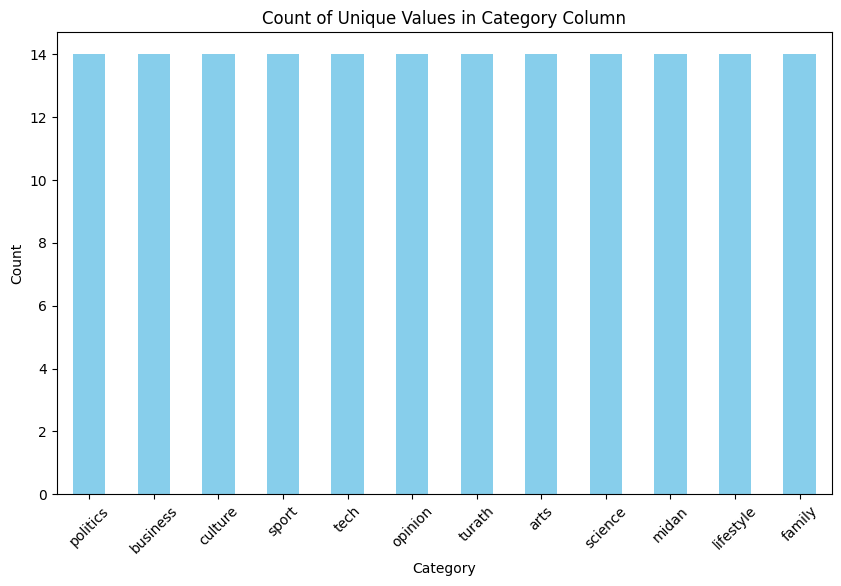

In [65]:
import matplotlib.pyplot as plt
# Count the unique values in the 'Category' column
category_counts = df['Category'].value_counts()

# Plot the histogram
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Unique Values in Category Column')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
